# Is a Country's High School Gradution Rates affected by other factors?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

### Todd: Top 10 Countries for Education (Men and Women) AND Education rate vs Net Migration


In [2]:
#Assigning a variable to the path each relevant csv file in prep for merge
edu_payload = ("Resources/Clean Education.csv")
migra_payload = ("Resources/Cleaned Demographics.csv")

education_df = pd.read_csv(edu_payload)
migration_df = pd.read_csv(migra_payload)

edumi_df = pd.merge(education_df, migration_df, how="outer", on=["countries and areas"])

#Taking essential columns
wshedmi = edumi_df[['countries and areas','Completion rate 2012–2018, Upper secondary education, male','Completion rate 2012–2018, Upper secondary education, female', 'Net migration rate (per 1,000 population) 2015−2020']]
wshedmi

# get rid of "-" that are supposed to be NA
wshedmi.loc[:,('Completion rate 2012–2018, Upper secondary education, male')] = wshedmi['Completion rate 2012–2018, Upper secondary education, male'].apply(lambda x: x.replace('−',''))
wshedmi.loc[:,('Completion rate 2012–2018, Upper secondary education, female')] = wshedmi['Completion rate 2012–2018, Upper secondary education, female'].apply(lambda x: x.replace('−',''))
wshedmi.loc[:,('Net migration rate (per 1,000 population) 2015−2020')] = wshedmi['Net migration rate (per 1,000 population) 2015−2020'].apply(lambda x: x.replace('−',''))

# chech it was taken out
wshedmi

C:\Users\swati\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,countries and areas,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female","Net migration rate (per 1,000 population) 2015−2020"
0,Afghanistan,32,14,-1.7
1,Albania,43,60,-4.9
2,Algeria,30,47,-0.2
3,Andorra,,,
4,Angola,21,15,0.2
...,...,...,...,...
197,Venezuela (Bolivarian Republic of),,,-22.3
198,Viet Nam,50,61,-0.8
199,Yemen,37,23,-1.1
200,Zambia,34,23,-0.5


In [3]:
# save as csv so that we can drop the NAs
wshedmi.to_csv("Output_Data/Education and Migration.csv", encoding='utf-8', index=False)

# import merged and cleaned data
ed_mig = pd.read_csv("Output_Data/Education and Migration.csv")

#drop blank rows
ed_mig = ed_mig.dropna(how="any")

# print new data
ed_mig

,countries and areas,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female","Net migration rate (per 1,000 population) 2015−2020"
0,Afghanistan,32.0,14.0,-1.7
1,Albania,43.0,60.0,-4.9
2,Algeria,30.0,47.0,-0.2
4,Angola,21.0,15.0,0.2
7,Argentina,53.0,66.0,0.1
...,...,...,...,...
194,Uruguay,45.0,28.0,-0.9
198,Viet Nam,50.0,61.0,-0.8
199,Yemen,37.0,23.0,-1.1
200,Zambia,34.0,23.0,-0.5


In [4]:
# Map out Top 10 Best Contries for Ed Completion
# sort male and female completion rates, and reduce to top 10
sorted_m_ed = ed_mig.sort_values("Completion rate 2012–2018, Upper secondary education, male", ascending = False)
top_ten_m = sorted_m_ed.head(10)
sorted_f_ed = ed_mig.sort_values("Completion rate 2012–2018, Upper secondary education, female", ascending = False)
top_ten_f = sorted_f_ed.head(10)

#### Top 10 Country's for Male Graduation Rates
* Based of the fact that North Korea is the top country at 100%, we expect that not all countries are reporting honestly.

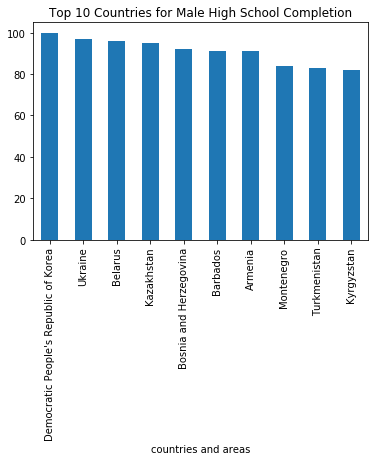

In [5]:
# bar plot of top 10 countries for male completion rate
top_ten_m.plot.bar(x='countries and areas', y='Completion rate 2012–2018, Upper secondary education, male', rot=90, title="Top 10 Countries for Male High School Completion", legend=False)

#### Top 10 Country's for Female Graduation Rates
* Based of the fact that North Korea is the top country at 100%, we expect that not all countries are reporting honestly.

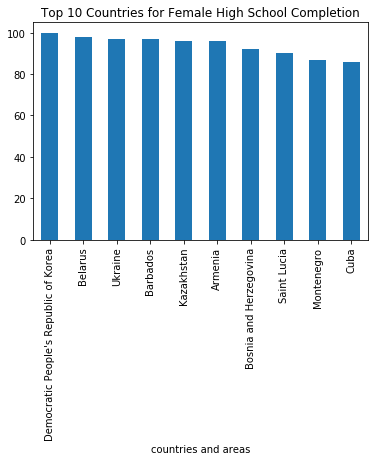

In [6]:
# bar plot of top 10 countries for female completion rate
top_ten_f.plot.bar(x='countries and areas', y='Completion rate 2012–2018, Upper secondary education, female', rot=90, title="Top 10 Countries for Female High School Completion", legend=False)

#### Male Graduation Rate vs Net Migration
* No real affect : most data points are clustered around 0 regardless of graduation rate

The r-squared is: 0.16881582302977685


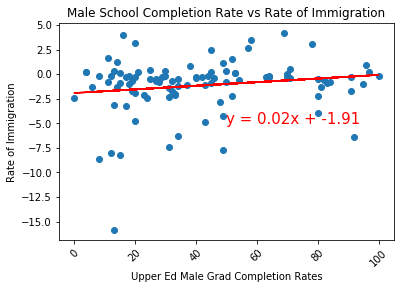

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(uedm,rofm)
regress_values = uedm * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(uedm, rofm)
plt.plot(uedm,regress_values,"r-")
plt.annotate(line_eq,(50,-5),fontsize=15,color="red")
plt.xticks(rotation=45)
plt.title("Male School Completion Rate vs Rate of Immigration")
plt.xlabel("Upper Ed Male Grad Completion Rates")
plt.ylabel("Rate of Immigration")
print(f"The r-squared is: {rvalue}")
plt.savefig('Images/Male Upper Ed Completion vs Rate of Immigration.png')

#### Female Graduation Rate vs Net Migration
* No real affect : most data points are clustered around 0 regardless of graduation rate

The r-squared is: 0.15089963217593627


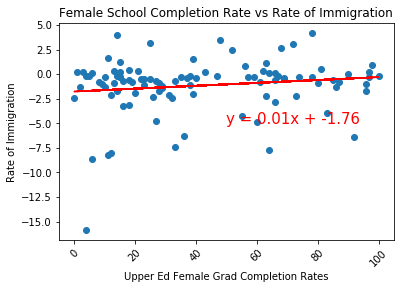

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(uedf,rofm)
regress_values = uedf * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(uedf, rofm)
plt.plot(uedf,regress_values,"r-")
plt.annotate(line_eq,(50,-5),fontsize=15,color="red")
plt.xticks(rotation=45)
plt.title("Female School Completion Rate vs Rate of Immigration")
plt.xlabel("Upper Ed Female Grad Completion Rates")
plt.ylabel("Rate of Immigration")
print(f"The r-squared is: {rvalue}")
plt.savefig('Images/Female Upper Ed Completion vs Rate of Immigration.png')

### Steve: Education rate vs Breastfeeding rate at birth AND Education rate vs Life expectancy

In [14]:
# identify files
education = "Resources/Clean Education.csv"
life_exp = "Resources/Cleaned Demographics.csv"
breastfeeding = "Resources/Clean Infant Nutrition.csv"

# read csv
education_df = pd.read_csv(education)
life_exp_df = pd.read_csv(life_exp)
breastfeeding_df = pd.read_csv(breastfeeding)

# merge the two data tables
ed_life = pd.merge(education_df, life_exp_df)
ed_b_life = pd.merge(ed_life, breastfeeding_df)

# print combines data frame
ed_b_life

# print column names to identify the required ones
ed_b_life.columns

Index(['countries and areas',
       '"Out-of-school rate 2012–2018*" One year before primary entry age, male',
       '"Out-of-school rate 2012–2018*" One year before primary entry age, female',
       'Out-of-school rate 2012–2018, Primary education, male',
       'Out-of-school rate 2012–2018, Primary education, female',
       'Out-of-school rate 2012–2018, Lower secondary education, male',
       'Out-of-school rate 2012–2018, Lower secondary education, female',
       'Out-of-school rate 2012–2018, male',
       'Out-of-school rate 2012–2018, female',
       'Completion rate 2012–2018, Primary education, male',
       'Completion rate 2012–2018, Primary education, female',
       'Completion rate 2012–2018, Lower secondary education, male',
       'Completion rate 2012–2018, Lower secondary education, female',
       'Completion rate 2012–2018, Upper secondary education, male',
       'Completion rate 2012–2018, Upper secondary education, female',
       'Learning outcomes 2010–2

In [15]:
# choose specific columns
specific_data = ed_b_life.iloc[:, [0, 13, 14, 32, 42]]

# confirm that correct columns are chosen
specific_data

,countries and areas,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female",Life expectancy at birth (years): 2018,"""Infant and Young Child Feeding (0-23 months) 2013–2018*"" Early initiation of breastfeeding (%)"
0,Afghanistan,32,14,64,63.0
1,Albania,43,60,78,57.0
2,Algeria,30,47,77,36.0
3,Andorra,−,−,−,NaN
4,Angola,21,15,61,48.0
...,...,...,...,...,...
197,Venezuela (Bolivarian Republic of),−,−,72,NaN
198,Viet Nam,50,61,75,26.0
199,Yemen,37,23,66,53.0
200,Zambia,34,23,64,66.0


In [16]:
# remove "-"s
specific_data['Life expectancy at birth (years): 2018'] = specific_data['Life expectancy at birth (years): 2018'].apply(lambda x: x.replace('−',''))
specific_data['Completion rate 2012–2018, Upper secondary education, male'] = specific_data['Completion rate 2012–2018, Upper secondary education, male'].apply(lambda x: x.replace('−',''))
specific_data['Completion rate 2012–2018, Upper secondary education, female'] = specific_data['Completion rate 2012–2018, Upper secondary education, female'].apply(lambda x: x.replace('-',''))

# save data frame as csv so we can remove NAs
specific_data.to_csv("Output_Data/Education, Breastfeeding and Life Exp.csv", encoding='utf-8', index=False)

# import merged and cleaned data
spec_data = pd.read_csv("Output_Data/Education, Breastfeeding and Life Exp.csv")

#drop blank rows
spec_data = spec_data.dropna(how="any")

# print new data
spec_data

C:\Users\swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,countries and areas,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female",Life expectancy at birth (years): 2018,"""Infant and Young Child Feeding (0-23 months) 2013–2018*"" Early initiation of breastfeeding (%)"
0,Afghanistan,32.0,14,64.0,63.0
1,Albania,43.0,60,78.0,57.0
2,Algeria,30.0,47,77.0,36.0
4,Angola,21.0,15,61.0,48.0
7,Argentina,53.0,66,77.0,53.0
...,...,...,...,...,...
194,Uruguay,45.0,28,78.0,77.0
198,Viet Nam,50.0,61,75.0,26.0
199,Yemen,37.0,23,66.0,53.0
200,Zambia,34.0,23,64.0,66.0


In [17]:
# identify variables for easier plotting
male = spec_data['Completion rate 2012–2018, Upper secondary education, male']
female = spec_data['Completion rate 2012–2018, Upper secondary education, female'].astype(float)
life_exp = spec_data['Life expectancy at birth (years): 2018']
breast_feeding = spec_data['"Infant and Young Child Feeding (0-23 months) 2013–2018*" Early initiation of breastfeeding (%)']

#### Male Graduation Rate vs Life Expectancy
* Not a perfect relationship, but a country's life expectancy does seem to increase when more of the country is educated.

The r-squared is: 0.5850777912570791


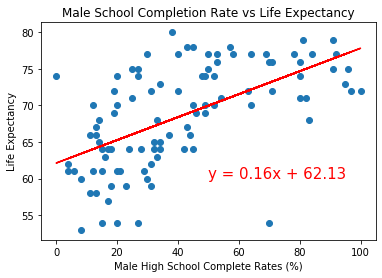

In [44]:
# scatter plot of male complete rate vs life expectancy
(slope, intercept, rvalue, pvalue, stderr) = linregress(male,life_exp)
regress_values = male * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(male, life_exp)
plt.plot(male,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.title("Male School Completion Rate vs Life Expectancy")
plt.xlabel("Male High School Complete Rates (%)")
plt.ylabel("Life Expectancy")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/male vs life")

#### Female Graduation Rate vs Life Expectancy
* Not a perfect relationship, but a country's life expectancy does seem to increase when more of the country is educated.

The r-squared is: 0.6707625673932368


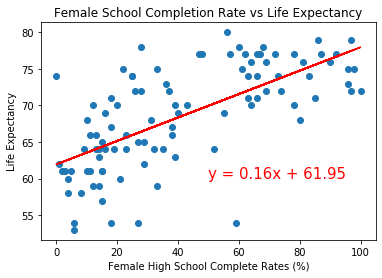

In [45]:
# scatter plot of female complete rate vs life expectancy
(slope, intercept, rvalue, pvalue, stderr) = linregress(female,life_exp)
regress_values = female * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(female, life_exp)
plt.plot(female,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.title("Female School Completion Rate vs Life Expectancy")
plt.xlabel("Female High School Complete Rates (%)")
plt.ylabel("Life Expectancy")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/female vs life")

#### Male Graduation Rate vs Breastfeeding Rate at birth
* There does not seem to be any relationship between breastfeeding early on and a country's graduation rate.

The r-squared is: -0.07469614861607361


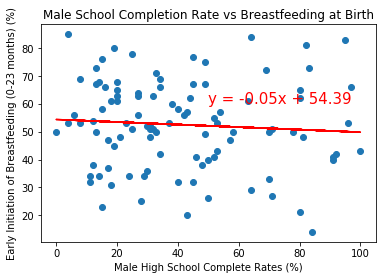

In [46]:
# scatter plot of male complete rate vs breastfeeding rate
(slope, intercept, rvalue, pvalue, stderr) = linregress(male,breast_feeding)
regress_values = male * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(male, breast_feeding)
plt.plot(male,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.title("Male School Completion Rate vs Breastfeeding at Birth")
plt.xlabel("Male High School Complete Rates (%)")
plt.ylabel("Early Initiation of Breastfeeding (0-23 months) (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/male vs breastfeeding")

#### Female Graduation Rate vs Breastfeeding Rate at birth
* There does not seem to be any relationship between breastfeeding early on and a country's graduation rate.

The r-squared is: -0.07315378230789517


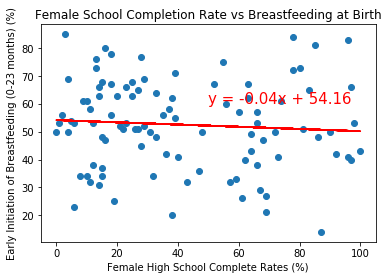

In [47]:
# scatter plot of male complete rate vs breastfeeding rate
(slope, intercept, rvalue, pvalue, stderr) = linregress(female,breast_feeding)
regress_values = female * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(female, breast_feeding)
plt.plot(female,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.title("Female School Completion Rate vs Breastfeeding at Birth")
plt.xlabel("Female High School Complete Rates (%)")
plt.ylabel("Early Initiation of Breastfeeding (0-23 months) (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/female vs breastfeeding")

### Tyler: Education rate vs Malnutrition rate AND Education rate vs Fertility (# of children per woman)

In [32]:
edu_df = pd.read_csv('Resources/Clean Education.csv')
nut_df = pd.read_csv('Resources/Clean School Aged Nutrition.csv')
demog_df = pd.read_csv('Resources/Cleaned Demographics.csv')

# merge
tylerData1 = pd.merge(edu_df, nut_df)
tylerDataComplete = pd.merge(tylerData1, demog_df)

# print column names to identify the required ones
tylerDataComplete.columns

Index(['countries and areas',
       '"Out-of-school rate 2012–2018*" One year before primary entry age, male',
       '"Out-of-school rate 2012–2018*" One year before primary entry age, female',
       'Out-of-school rate 2012–2018, Primary education, male',
       'Out-of-school rate 2012–2018, Primary education, female',
       'Out-of-school rate 2012–2018, Lower secondary education, male',
       'Out-of-school rate 2012–2018, Lower secondary education, female',
       'Out-of-school rate 2012–2018, male',
       'Out-of-school rate 2012–2018, female',
       'Completion rate 2012–2018, Primary education, male',
       'Completion rate 2012–2018, Primary education, female',
       'Completion rate 2012–2018, Lower secondary education, male',
       'Completion rate 2012–2018, Lower secondary education, female',
       'Completion rate 2012–2018, Upper secondary education, male',
       'Completion rate 2012–2018, Upper secondary education, female',
       'Learning outcomes 2010–2

In [33]:
# remove "-"s
tylerDataComplete['Total fertility  (live births per woman) 2018'] = tylerDataComplete['Total fertility  (live births per woman) 2018'].apply(lambda x: x.replace('−',''))
tylerDataComplete['Completion rate 2012–2018, Upper secondary education, male'] = tylerDataComplete['Completion rate 2012–2018, Upper secondary education, male'].apply(lambda x: x.replace('−',''))
tylerDataComplete['Completion rate 2012–2018, Upper secondary education, female'] = tylerDataComplete['Completion rate 2012–2018, Upper secondary education, female'].apply(lambda x: x.replace('-',''))

# choose specific columns
tylerDataSpecific = tylerDataComplete.iloc[:, [13, 14, 23, 41]]

# save data frame as csv so we can remove NAs
tylerDataSpecific.to_csv("Output_Data/Education and Fertility.csv", encoding='utf-8', index=False)

# import merged and cleaned data
tylerDS = pd.read_csv("Output_Data/Education and Fertility.csv")

#drop blank rows
tylerDS = tylerDS.dropna(how="any")

# print new data
tylerDS

,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female",Malnutrition among preschool-aged children (0–4 years of age) 2013–2018*: Stunted (%) (moderate and severe): all children,Total fertility (live births per woman) 2018
0,32.0,14,41,4.5
1,43.0,60,11,1.6
2,30.0,47,12,3.0
4,21.0,15,38,5.5
7,53.0,66,8,2.3
...,...,...,...,...
194,45.0,28,11,2.0
198,50.0,61,25,2.0
199,37.0,23,46,3.8
200,34.0,23,40,4.6


In [34]:
# identify variables for easier plotting
male = tylerDS['Completion rate 2012–2018, Upper secondary education, male']
female = tylerDS['Completion rate 2012–2018, Upper secondary education, female'].astype(float)
fertility = tylerDS['Total fertility  (live births per woman) 2018']
malnutrition = tylerDS['Malnutrition among preschool-aged children (0–4 years of age) 2013–2018*: Stunted (%) (moderate and severe): all children'].astype(float)

#### Male Graduation Rate vs Number of Births per Woman
* Not a perfect relationship, but it does seem that the higher a country's graduation rate the fewer times a woman gives birth.

The r-squared is: -0.6179415030423938


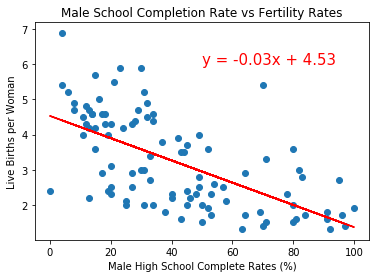

In [48]:
# scatter plot of male complete rate vs fertility rates
(slope, intercept, rvalue, pvalue, stderr) = linregress(male,fertility)
regress_values = male * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(male, fertility)
plt.plot(male,regress_values,"r-")
plt.annotate(line_eq,(50,6),fontsize=15,color="red")
plt.title("Male School Completion Rate vs Fertility Rates")
plt.xlabel("Male High School Complete Rates (%)")
plt.ylabel("Live Births per Woman")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/male rate vs fertility")

#### Female Graduation Rate vs Number of Births per Woman
* Not a perfect relationship, but it does seem that the higher a country's graduation rate the fewer times a woman gives birth.

The r-squared is: -0.6962572022487052


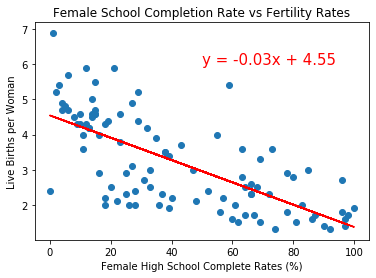

In [49]:
# scatter plot of female complete rate vs fertility rates
(slope, intercept, rvalue, pvalue, stderr) = linregress(female, fertility)
regress_values = female * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(female, fertility)
plt.plot(female,regress_values,"r-")
plt.annotate(line_eq,(50,6),fontsize=15,color="red")
plt.title("Female School Completion Rate vs Fertility Rates")
plt.xlabel("Female High School Complete Rates (%)")
plt.ylabel("Live Births per Woman")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/female rate vs fertility")

#### Male Graduation Rate vs Malnutrition amongst Preschool-aged children
* Not a perfect relationship, but it does seem that the higher a country's graduation rate the smaller the malnutrition rate amongst children.
* One issue with the data could be that we are comparing different children - the students who are graduating are not the same who are malnutritioned based on the time period.

The r-squared is: -0.5277379102324901


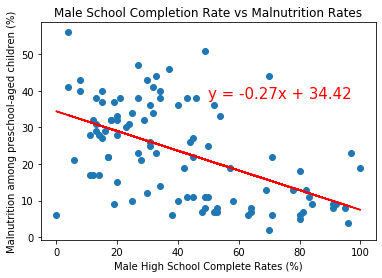

In [50]:
# scatter plot of male complete rate vs malnutrition
(slope, intercept, rvalue, pvalue, stderr) = linregress(male,malnutrition)
regress_values = male * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(male, malnutrition)
plt.plot(male,regress_values,"r-")
plt.annotate(line_eq,(50,38),fontsize=15,color="red")
plt.title("Male School Completion Rate vs Malnutrition Rates")
plt.xlabel("Male High School Complete Rates (%)")
plt.ylabel("Malnutrition among preschool-aged children (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/male rate vs malnutrition")

#### Female Graduation Rate vs Malnutrition amongst Preschool-aged children
* Not a perfect relationship, but it does seem that the higher a country's graduation rate the smaller the malnutrition rate amongst children.
* One issue with the data could be that we are comparing different children - the students who are graduating are not the same who are malnutritioned based on the time period.

The r-squared is: -0.6288847171083061


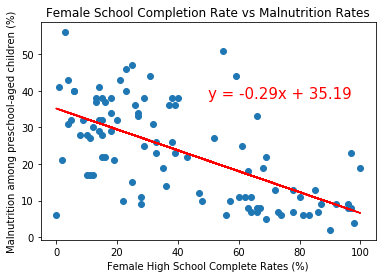

In [51]:
# scatter plot of female complete rate vs malnutrition
(slope, intercept, rvalue, pvalue, stderr) = linregress(female,malnutrition)
regress_values = female * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(female, malnutrition)
plt.plot(female,regress_values,"r-")
plt.annotate(line_eq,(50,38),fontsize=15,color="red")
plt.title("Female School Completion Rate vs Malnutrition Rates")
plt.xlabel("Female High School Complete Rates (%)")
plt.ylabel("Malnutrition among preschool-aged children (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/female rate vs malnutrition")

### Swati: Education rate vs Basic Water Access AND Education rate vs Basic Sanitation Services

In [53]:
# identify files
education = "Resources/Clean Education.csv"
water_sanitation = "Resources/Clean WASH.csv"

# read csv
education_df = pd.read_csv(education)
water_san_df = pd.read_csv(water_sanitation)

# print education data
education_df

# print water and sanitation data
water_san_df

,countries and areas,Households: At least basic drinking water services (%) 2017: Total,Households: At least basic drinking water services (%) 2017: urban,Households: At least basic drinking water services (%) 2017: rural,Households: At least basic sanitation services (%) 2017: total,Households: At least basic sanitation services (%) 2017: urban,Households: At least basic sanitation services (%) 2017: rural,Households: Basic hygiene facilities (%) 2017: total,Households: Basic hygiene facilities (%) 2017: urban,Households: Basic hygiene facilities (%) 2017: rural,...,Schools: Basic sanitation services (%) 2016: total,Schools: Basic sanitation services (%) 2016: primary,Schools: Basic sanitation services (%) 2016: secondary,Schools: Basic hygiene services (%) 2016: total,Schools: Basic hygiene services (%) 2016: pimary,Schools: Basic hygiene services (%) 2016: secondary,"Health Care Facilities: ""Basic water services (%) 2016"": total","Health Care Facilities: ""Basic sanitation services (%) 2016"": total","Health Care Facilities: ""Basic hygiene services (%) 2016"": total","Health Care Facilities: ""Basic waste management services (%) 2016"": total"
0,Afghanistan,67.0,96.0,57.0,43.0,62.0,37.0,38.0,64.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,91.0,92.0,90.0,98.0,98.0,97.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,94.0,95.0,89.0,88.0,90.0,82.0,84.0,88.0,73.0,...,99.0,98.0,100.0,99.0,98.0,99.0,NaN,NaN,NaN,NaN
3,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,100.0
4,Angola,56.0,71.0,27.0,50.0,64.0,23.0,27.0,34.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela (Bolivarian Republic of),96.0,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Viet Nam,95.0,99.0,93.0,84.0,94.0,78.0,86.0,93.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,NaN,NaN
199,Yemen,63.0,79.0,55.0,59.0,88.0,43.0,50.0,71.0,38.0,...,25.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,13.0
200,Zambia,60.0,84.0,42.0,26.0,36.0,19.0,14.0,26.0,5.0,...,66.0,NaN,NaN,54.0,52.0,63.0,40.0,NaN,NaN,40.0


In [54]:
# merge the two data tables
education_wash = pd.merge(education_df, water_san_df)

# take out the "−" inside the columns
education_wash['Completion rate 2012–2018, Upper secondary education, male'] = education_wash['Completion rate 2012–2018, Upper secondary education, male'].apply(lambda x: x.replace('−',''))
education_wash['Completion rate 2012–2018, Upper secondary education, female'] = education_wash['Completion rate 2012–2018, Upper secondary education, female'].apply(lambda x: x.replace('−',''))

# identify specific columns necessary
upper_ed_wash = education_wash.iloc[:, [0,13,14,23,26]]

# save data frame as csv
upper_ed_wash.to_csv("Output_Data/Education completion rate and Household WASH.csv", encoding='utf-8', index=False)

# import merged and cleaned data
u_ed_wash = pd.read_csv("Output_Data/Education completion rate and Household WASH.csv")

#drop blank rows
u_ed_wash = u_ed_wash.dropna(how="any")

# print new data
u_ed_wash

,countries and areas,"Completion rate 2012–2018, Upper secondary education, male","Completion rate 2012–2018, Upper secondary education, female",Households: At least basic drinking water services (%) 2017: Total,Households: At least basic sanitation services (%) 2017: total
0,Afghanistan,32.0,14.0,67.0,43.0
1,Albania,43.0,60.0,91.0,98.0
2,Algeria,30.0,47.0,94.0,88.0
4,Angola,21.0,15.0,56.0,50.0
8,Armenia,91.0,96.0,100.0,94.0
...,...,...,...,...,...
194,Uruguay,45.0,28.0,99.0,97.0
198,Viet Nam,50.0,61.0,95.0,84.0
199,Yemen,37.0,23.0,63.0,59.0
200,Zambia,34.0,23.0,60.0,26.0


In [55]:
# label each column as a variable
male = u_ed_wash["Completion rate 2012–2018, Upper secondary education, male"]
female = u_ed_wash["Completion rate 2012–2018, Upper secondary education, female"]
water = u_ed_wash["Households: At least basic drinking water services (%) 2017: Total"]
sanitation = u_ed_wash["Households: At least basic sanitation services (%) 2017: total"]

#### Male Graduation Rate vs Drinking Water Availabilty at Home
* Not a perfect relationship, but it does seem that the higher country's graduation rate the more likely it is that citizens have access to drinking water at home.

The r-squared is: 0.5738502731897467


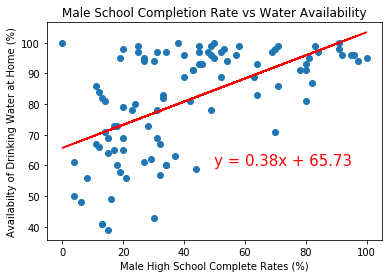

In [57]:
# scatter plot of male complete rate vs water availability
(slope, intercept, rvalue, pvalue, stderr) = linregress(male,water)
regress_values = male * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(male, water)
plt.plot(male,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.title("Male School Completion Rate vs Water Availability")
plt.xlabel("Male High School Complete Rates (%)")
plt.ylabel("Availabilty of Drinking Water at Home (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/male rate vs water")

#### Female Graduation Rate vs Drinking Water Availabilty at Home
* Not a perfect relationship, but it does seem that the higher country's graduation rate the more likely it is that citizens have access to drinking water at home.

The r-squared is: 0.6585364566729688


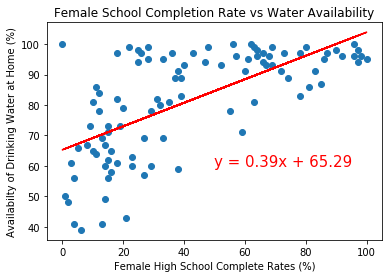

In [58]:
# scatter plot of female complete rate vs water availability
(slope, intercept, rvalue, pvalue, stderr) = linregress(female,water)
regress_values = female * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(female, water)
plt.plot(female,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.title("Female School Completion Rate vs Water Availability")
plt.xlabel("Female High School Complete Rates (%)")
plt.ylabel("Availabilty of Drinking Water at Home (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/female rate vs water")

#### Male Graduation Rate vs Sanitation Services Available at Home
* There does seem to be a relationship between a country's graduation rate and whether or not kids have access to sanitation services at home.

The r-squared is: 0.6748692845588109


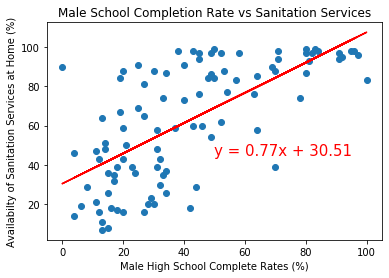

In [59]:
# scatter plot of male complete rate vs sanitation services
(slope, intercept, rvalue, pvalue, stderr) = linregress(male,sanitation)
regress_values = male * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(male, sanitation)
plt.plot(male,regress_values,"r-")
plt.annotate(line_eq,(50,45),fontsize=15,color="red")
plt.title("Male School Completion Rate vs Sanitation Services")
plt.xlabel("Male High School Complete Rates (%)")
plt.ylabel("Availabilty of Sanitation Services at Home (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/male completion vs sanitation")

#### Female Graduation Rate vs Sanitation Services Available at Home
* There does seem to be a relationship between a country's graduation rate and whether or not kids have access to sanitation services at home.

The r-squared is: 0.7516131348330928


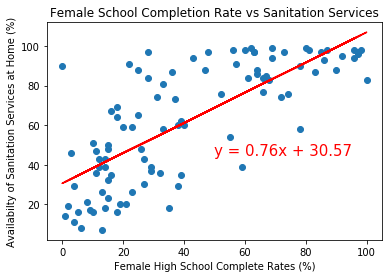

In [60]:
# scatter plot of female complete rate vs sanitation services
(slope, intercept, rvalue, pvalue, stderr) = linregress(female,sanitation)
regress_values = female * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(female, sanitation)
plt.plot(female,regress_values,"r-")
plt.annotate(line_eq,(50,45),fontsize=15,color="red")
plt.title("Female School Completion Rate vs Sanitation Services")
plt.xlabel("Female High School Complete Rates (%)")
plt.ylabel("Availabilty of Sanitation Services at Home (%)")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/female completion vs sanitation")